<a href="https://colab.research.google.com/github/SayaliJadhav2109/SCT_TrackCode_Task_1/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/content/sample_data/gender_submission.csv')

In [ ]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (418, 2)

First 5 rows:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

Data Types:
PassengerId    int64
Survived       int64
dtype: object

Missing Values:
PassengerId    0
Survived       0
dtype: int64


##Data Cleaning

In [ ]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Check for any invalid values in Survived (should only be 0 or 1)
print("Unique values in Survived:", df['Survived'].unique())

# No cleaning needed as this is already a clean submission file

Duplicate rows: 0
Unique values in Survived: [0 1]



Overall survival rate: 36.36%


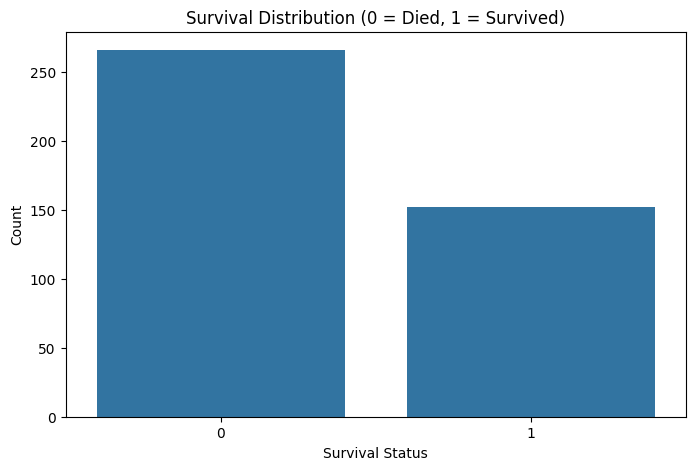

In [ ]:
# Survival rate
survival_rate = df['Survived'].mean()
print(f"\nOverall survival rate: {survival_rate:.2%}")

# Survival count
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution (0 = Died, 1 = Survived)')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.show()

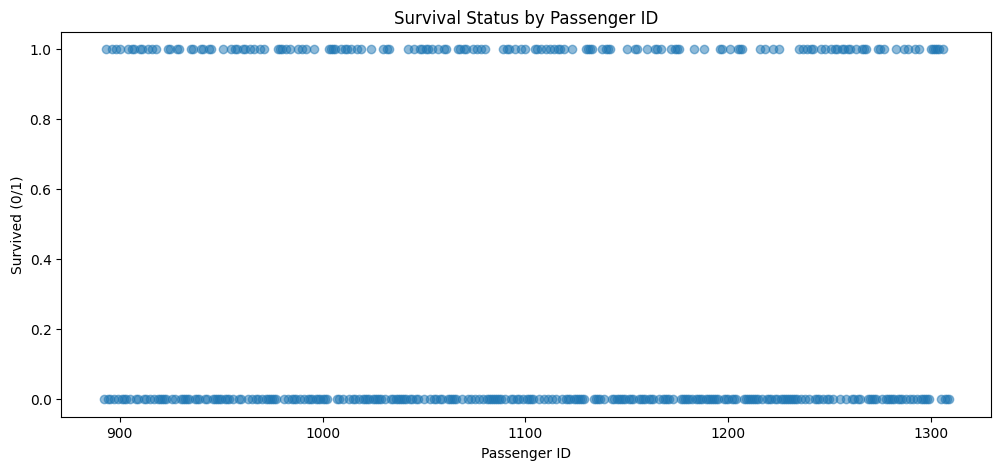

In [ ]:
# Check if PassengerId is continuous
plt.figure(figsize=(12, 5))
plt.plot(df['PassengerId'], df['Survived'], 'o', alpha=0.5)
plt.title('Survival Status by Passenger ID')
plt.xlabel('Passenger ID')
plt.ylabel('Survived (0/1)')
plt.show()

<ipython-input-7-848993859f26>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_survival = df.groupby('ID_Group')['Survived'].mean().reset_index()


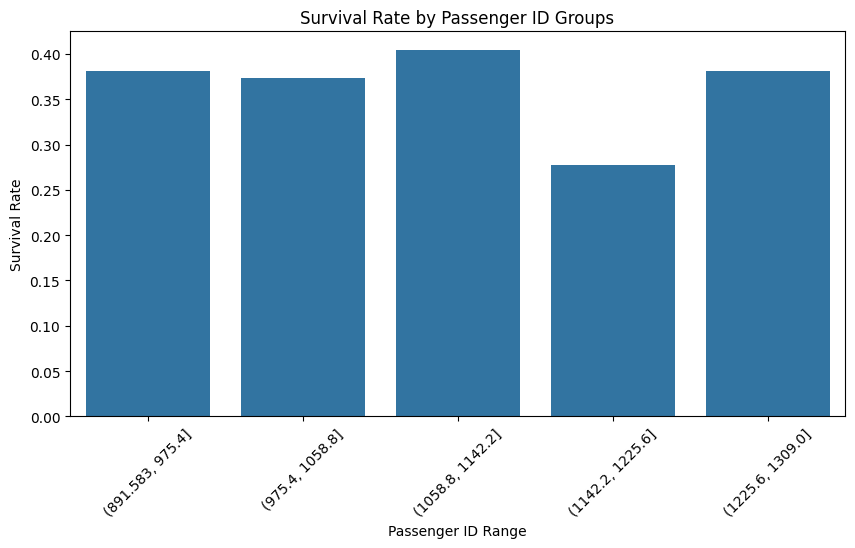

In [ ]:
# Survival rate by passenger ID groups (to detect any patterns)
df['ID_Group'] = pd.cut(df['PassengerId'], bins=5)
grouped_survival = df.groupby('ID_Group')['Survived'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='ID_Group', y='Survived', data=grouped_survival)
plt.title('Survival Rate by Passenger ID Groups')
plt.xlabel('Passenger ID Range')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

<ipython-input-8-ae32c0c457a1>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Survived'] == 0, 'PassengerId'], label='Died', shade=True)
<ipython-input-8-ae32c0c457a1>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['Survived'] == 1, 'PassengerId'], label='Survived', shade=True)


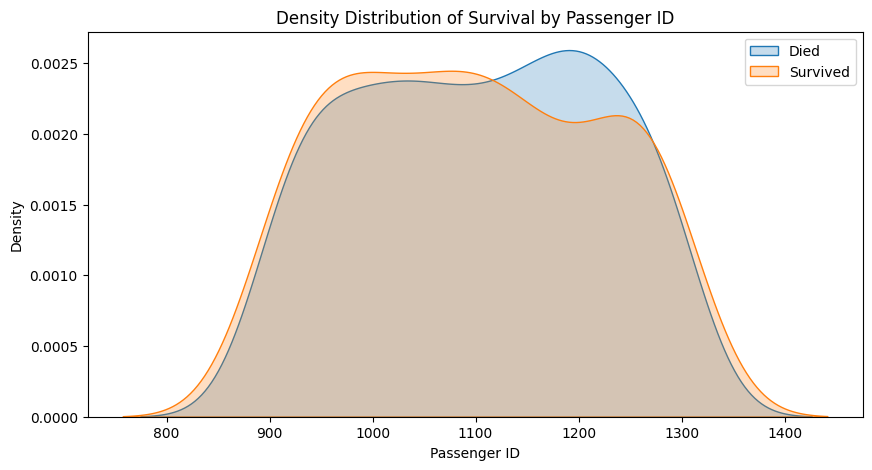

In [ ]:
# Survival distribution with kernel density estimate
plt.figure(figsize=(10, 5))
sns.kdeplot(df.loc[df['Survived'] == 0, 'PassengerId'], label='Died', shade=True)
sns.kdeplot(df.loc[df['Survived'] == 1, 'PassengerId'], label='Survived', shade=True)
plt.title('Density Distribution of Survival by Passenger ID')
plt.xlabel('Passenger ID')
plt.ylabel('Density')
plt.legend()
plt.show()

<ipython-input-9-670e4f3b0b75>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette=['#ff9999','#66b3ff'])
<ipython-input-9-670e4f3b0b75>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ID_Group', y='Survived', data=grouped_survival, palette='viridis')


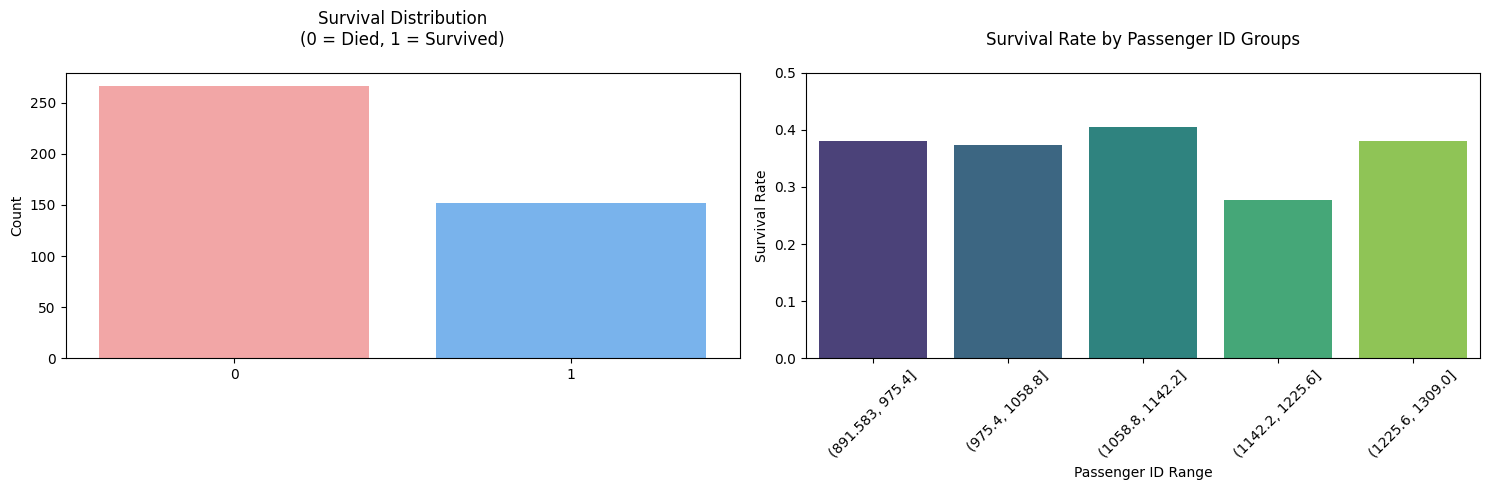

In [ ]:
# Final comprehensive visualization
plt.figure(figsize=(15, 5))

# Survival distribution
plt.subplot(1, 2, 1)
sns.countplot(x='Survived', data=df, palette=['#ff9999','#66b3ff'])
plt.title('Survival Distribution\n(0 = Died, 1 = Survived)', pad=20)
plt.xlabel('')
plt.ylabel('Count')

# Survival rate by ID groups
plt.subplot(1, 2, 2)
sns.barplot(x='ID_Group', y='Survived', data=grouped_survival, palette='viridis')
plt.title('Survival Rate by Passenger ID Groups', pad=20)
plt.xlabel('Passenger ID Range')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.ylim(0, 0.5)

plt.tight_layout()
plt.show()